---
<h1><center>  lab 6 : Text Feature Engineering </center>
    
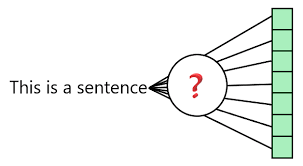


> `Created by: Jinnie Shin (jinnie.shin@ualberta.ca)`\
> `Date: `
---
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left">

 ### Required Packages or Dependencies

In [1]:
!pip install syllables #run this if you run into an error (download syllables)
import syllables
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.3/939.3 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 6.0.1
    Uninstalling importlib-resources-6.0.1:
      Successfully uninstalled importlib-resources-6.0.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.8.0
    Uninstalling importlib-metadata-6.8.0:
      Successfully uninstalled importlib-metadata-6.8.0



## **REVIEW**: Dataset

> Using the text_normalizer function we created last time, we will import `essay set 5`

#### Essay Set 8
`Prompt`: We all understand the benefits of laughter. For example, someone once said, "Laughter is the shortest distance between two people." Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part.


| Type of response            | Persuasive/Narrative/Expository |
|-----------------------------|---------------------------|
| Grade level                 | `10`                       |
| Total sample size           | `918`                |
| Average length of responses | `650 words`                  |
| Score range                 | `0-30`                       |

In [2]:
data = pd.read_excel('training_set_rel3.xlsx')
data = data[data.essay_set==8]
print(data.iloc[1].essay)

 Softball has to be one of the single most greatest sports alive; playing softball in college has always been a goal of mine. I love the dirt that sticks to your face, the sweat dripping from your forehead, and the gallons and gallons of water you poor all over yourself to keep cool in the blistering @CAPS2. Although I love softball I feel that the memories you acquire from the times you have with your teammates, are the things you remember the most through out your softball career. I have always had great memories through softball many laughs, tears, and frustrations so when I had the opportunity to play on a top notch team I looked forward to all the many more memories I would have.  Hood @CAPS1 @CAPS2 was my team name, I had played almost four years with this local team. Many of these girls were like sisters to me they had treated me amazingly through out my years playing with them. I felt like I had my set team, I was going to play with these girls all though high school and we wou


## 1. Extracting Descriptive Indices


In [ ]:
def descriptives(text):
    ## the total number of sentences

    ############################ MINI TASK ###################################

    #1. Total number of sentences
    #sentences = ```Tokenize the text into sentences, text is a single essay``


    ##########################################################################
    n_sentences = len(sentences)

      ## the total number of words (tokens)
    ############################ MINI TASK ###################################

    #2. Total number of words
    #words = ```Tokenize the text into tokens (words), text is a single essay``


    ##########################################################################
    n_words = len(words)

      ## the total number of unique vocabulary
    unique_words = set(words)
    n_unique_words = len(unique_words)

      ## the total number of stop words
    import nltk
    stop_words = list(set(nltk.corpus.stopwords.words('english')))
    n_stopwords = len([i for i in words if i in stop_words])

      ## the total number of punctuation marks
    n_punc = len([i for i in words if i in """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""])

      ## total number of syllables
    n_syllables = np.sum([syllables.estimate(i) for i in words])

    ############################ MINI TASK ###################################

    #1. Total number of unique lemmas

    #n_lemmas=
    #2. Total number of unique stems


    #n_stems=
    ##########################################################################

    return n_sentences, n_words, n_unique_words, n_stopwords, n_punc, n_syllables #, n_lemmas, n_stems

> *Let's explore!*

In [ ]:
text = data.iloc[0].essay

descriptives(text)

NameError: ignored

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

> ## Task 1: Descriptive Indices

> Q1. Let's apply the `descriptives` function to the entire dataframe (`data.essay`) and save them into a new column (`features`)

In [ ]:
################# YOUR CODE HERE ############
data['features'] = data.essay.apply(descriptives)
data.features
############################################

## 2. Readability Indices

In [ ]:
class readability():

    def __init__(self):
        self.n_sent, self.n_word, self.n_unique, self.n_stop, self.n_punc, self.n_syll, _, _ = descriptives(text)

    def fr_score(self, text):
        score = 206.835-1.015*(self.n_word/self.n_sent) - 84.6*(self.n_syll/self.n_word)
        return score

    def gf_score(self, text):
        score = 0.4*((self.n_word/self.n_sent)+ 100*(self.n_word))
        return score

    def smog(self, text):
        if self.n_sent < 30:
            score = 1.0430*np.sqrt(self.n_syll*(30/self.n_sent))+3.1291
            return score
        else:
            return print('total number of sentences are less than 30')

In [ ]:
analyzer = readability()
print(analyzer.fr_score(text))
print(analyzer.gf_score(text))
print(analyzer.smog(text))

86.72442806694306
33408.5641025641
total number of sentences are less than 30
None


## 4. LFTK: Handcrafted Features in Computational Linguistics
> More information about LFTK is available at: https://github.com/brucewlee/lftk

In [3]:
!pip install lftk

!pip install spacy

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lftk: filename=lftk-1.0.9-py3-none-any.whl size=2359765 sha256=05a40550024f73a6c997d6c728ae7433c233151a8cc7c4905001875cd368f56d
  Stored in directory: /root/.cache/pip/wheels/51/3e/19/8a82ad750c6321373b8557b6cf4f35241ac04a9aefd8a489a7
Successfully built lftk
2023-10-03 12:30:18.022329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 12:30:19.129435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('e

## Example Script (from LFTK)

In [7]:
import spacy
import lftk

# load a trained pipeline of your choice from spacy
# remember we already downloaed "en_core_web_sm" pipeline above?
nlp = spacy.load("en_core_web_sm")

# create a spaCy doc object
doc = nlp("I love research but my professor is strange.")

# initiate LFTK extractor by passing in doc
# you can pass in a list of multiple docs
LFTK = lftk.Extractor(docs = doc)

# optionally, you can customize how LFTK extractor calculates handcrafted linguistic features
# for example, include stop word? include puncutaion? maximum decimal digits?
LFTK.customize(stop_words=True, punctuations=False, round_decimal=3)

# now, extract the handcrafted linguistic features that you need
# refer to them as feature keys
extracted_features = LFTK.extract(features = ["a_word_ps", "a_kup_pw", "n_noun"])

# {'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}
print(extracted_features)

{'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}


### Let's explore

In [9]:
############################ MINI TASK ###################################

#1. Randomly sample 10 response from out dataset (only the raw responses)

#2. Apply the LTFK functions to extract word difficulty related features
lftk.search_features(family = "worddiff")

#3. [ADVANCED] Identify the features that are most highly associated with the essay score


##########################################################################


[{'key': 't_kup',
  'name': 'total_kuperman_age_of_acquistion_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'},
 {'key': 't_bry',
  'name': 'total_brysbaert_age_of_acquistion_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'},
 {'key': 't_subtlex_us_zipf',
  'name': 'total_subtlex_us_zipf_of_words',
  'formulation': 'foundation',
  'domain': 'lexico-semantics',
  'family': 'worddiff',
  'language': 'en'}]